In [1]:
#Please execute this cell
import jupman;
import soft;

# Bus network


## [Download worked project](../../_static/generated/bus-network-prj.zip)

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/bus-network)

In this worked project we will visualize intercity bus network in GTFS format. Original data was split in several files which we merged into dataset [network-short.csv](network-short.csv).

Data source: [dati.trentino.it](https://dati.trentino.it/dataset/trasporti-pubblici-del-trentino-formato-gtfs), MITT service, released under [Creative Commons Attribution 4.0](http://creativecommons.org/licenses/by/4.0/deed.it) licence.

<div class="alert alert-warning"> 
     
**REQUIREMENTS: Having read** [Relational data tutorial](https://en.softpython.org/relational/relational1-intro-sol.html#) **, which contains also instructions for installing required libraries.**
    
</div>    


![expected-network preview](expected-network.png)

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
bus-network-prj
    bus-network.ipynb
    bus-network-sol.ipynb
    soft.py                                    
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `bus-network.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`


## Introduction

To visualize data, we will use [networkx](https://networkx.github.io/) library. Let's first see an example on how to do it:

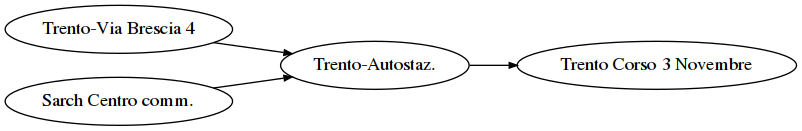

In [2]:
import networkx as nx
from soft import draw_nx


Gex = nx.DiGraph()

# we can force horizontal layout like this:

Gex.graph['graph']= {
                    'rankdir':'LR',  
                  }

# When we add nodes, we can identify them with an identifier like the
# stop_id which is separate from the label, because in some unfortunate
# case two different stops can share the same label. 

Gex.add_node('1', label='Trento-Autostaz.', 
                  color='black', fontcolor='black')
Gex.add_node('723', label='Trento-Via Brescia 4', 
                    color='black', fontcolor='black')
Gex.add_node('870', label='Sarch Centro comm.', 
                    color='black', fontcolor='black')
Gex.add_node('1180', label='Trento Corso 3 Novembre', 
                     color='black', fontcolor='black')

# IMPORTANT: edges connect stop_ids ,  NOT labels !!!!
Gex.add_edge('870','1')
Gex.add_edge('723','1')
Gex.add_edge('1','1180')

# function defined in sciprog.py :
draw_nx(Gex)
    

### Colors and additional attributes

Since we have a bus stop netowrk, we might want to draw edges according to the route they represent. Here we show how to do it only with the edge from _Trento-Autostaz_ to _Trento Corso 3 Novembre_: 

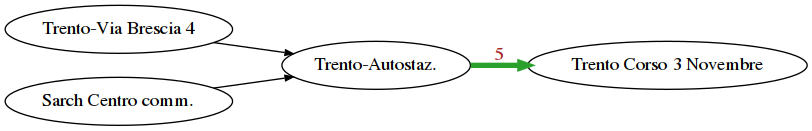

In [3]:
# we can retrieve an edge like this:

edge = Gex['1']['1180']

# and set attributes, like these:

edge['weight'] = 5                # it takes 5 minutes to go from Trento-Autostaz
                                  # to Trento Corso 3 Novembre
edge['label'] = str(5)            # the label is a string

edge['color'] = '#2ca02c'         # we can set some style for the edge, such as color 
edge['penwidth']= 4               # and thickness

edge['route_short_name'] = 'B301' # we can add any attribute we want, 
                                  # Note these custom ones won't show in the graph


draw_nx(Gex)

To be more explicit, we can also add a legend this way:

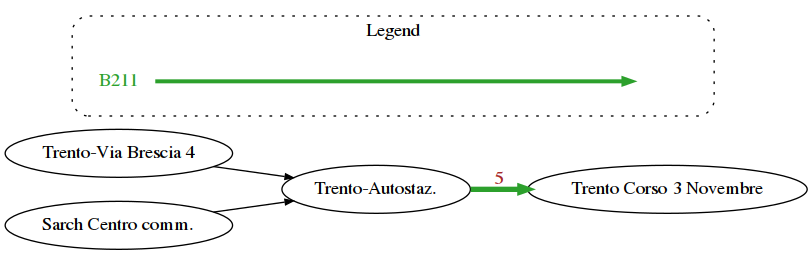

In [4]:
draw_nx(Gex, [{'color': '#2ca02c', 'label': 'B211'}])

In [5]:
# Note an edge is a simple dictionary:
print(edge)

{'weight': 5, 'label': '5', 'color': '#2ca02c', 'penwidth': 4, 'route_short_name': 'B301'}


### load_stops

To load [network-short.csv](network-short.csv), we provide this function:

In [6]:
def load_stops():
    """Loads file data and RETURN a list of dictionaries with the stop times
    """
    
    import csv
    with open('network-short.csv', newline='', encoding='UTF-8') as csvfile:
        reader = csv.DictReader(csvfile)
        lst = []
        for d in reader:
            lst.append(d)
    return lst


In [7]:
stops = load_stops()

#IMPORTANT: NOTICE *ALL* VALUES ARE *STRINGS*  !!!!!!!!!!!!

stops[0:2]

[OrderedDict([('', '3'),
              ('route_id', '76'),
              ('agency_id', '12'),
              ('route_short_name', 'B202'),
              ('route_long_name',
               'Trento-Sardagna-Candriai-Vaneze-Vason-Viote'),
              ('route_type', '3'),
              ('service_id', '22018091220190621'),
              ('trip_id', '0002402742018091220190621'),
              ('trip_headsign', 'Trento-Autostaz.'),
              ('direction_id', '0'),
              ('arrival_time', '06:27:00'),
              ('departure_time', '06:27:00'),
              ('stop_id', '5025'),
              ('stop_sequence', '4'),
              ('stop_code', '2620VE'),
              ('stop_name', 'Sardagna Civ.20'),
              ('stop_desc', ''),
              ('stop_lat', '46.073125'),
              ('stop_lon', '11.093579'),
              ('zone_id', '2620.0')]),
 OrderedDict([('', '4'),
              ('route_id', '76'),
              ('agency_id', '12'),
              ('route_short_name', 

## 1. extract_routes

Implement a function that extracts all route_short_name from the stops list and RETURNs
an alphabetically sorted list of them, without duplicates (see example)

Example:

```python
>>> stops = load_stops()
>>> extract_routes(stops)
['B201', 'B202', 'B211', 'B217', 'B301']
```

In [8]:

import networkx as nx
from soft import draw_nx

def extract_routes(stps):
    
   
    s = set()
    for diz in stps:
        s.add(diz['route_short_name'])
    ret = list(s)
    ret.sort()
    return ret
    
    
extract_routes(stops)    

['B201', 'B202', 'B211', 'B217', 'B301']

In [8]:

import networkx as nx
from soft import draw_nx

def extract_routes(stps):
    raise Exception('TODO IMPLEMENT ME !')
    
extract_routes(stops)    

## 2. to_int_min

Implement a function that takes a time string in the format like `08:27:42`
and RETURN the time since midnight in minutes, ignoring the seconds (es `507`)

In [9]:

def to_int_min(time_string):        
    
    hours = int(time_string[0:2])
    mins = int(time_string[3:5])
    return (hours * 60 + mins)
    
to_int_min('08:27:42')    

507

In [9]:

def to_int_min(time_string):        
    raise Exception('TODO IMPLEMENT ME !')
to_int_min('08:27:42')    

## 3. get_legend_edges

If you have `n` routes numbered from `0` to `n-1`, and you want to assign to each of them a different color, we provide this function: 

In [10]:
def get_color(i, n):
    """ RETURN the i-th color chosen from n possible colors, in 
        hex format (i.e. #ff0018).
    
        - if i < 0 or i >= n, raise ValueError
    """
    if n < 1:
        raise ValueError("Invalid n: %s" % n)
    if i < 0 or i >= n:
        raise ValueError("Invalid i: %s" % i)
    
    #HACKY, just for matplotlib < 3
    lst = ['#1f77b4',
         '#ff7f0e',
         '#2ca02c',
         '#d62728',
         '#9467bd',
         '#8c564b',
         '#e377c2',
         '#7f7f7f',
         '#bcbd22',
         '#17becf']
    
    return lst[i % 10]


In [11]:
get_color(4,5)

'#9467bd'

Now implement a function that RETURNs a list of dictionaries, where each dictionary represent a route  with label and associated color. Dictionaries are in the order returned by `extract_routes()` function.    

**Example**:

```python
>>> get_legend_edges()
[{'label': 'B201', 'color': '#1f77b4'},
 {'label': 'B202', 'color': '#ff7f0e'},
 {'label': 'B211', 'color': '#2ca02c'},
 {'label': 'B217', 'color': '#d62728'},
 {'label': 'B301', 'color': '#9467bd'}]
```

In [12]:

def get_legend_edges():
    
    legend_edges = []
    i = 0
    routes = extract_routes(stops)
    
    for route_short_name in routes:
        legend_edges.append({
            'label': route_short_name,
            'color':get_color(i,len(routes))
        })
        i += 1
    return legend_edges
    

get_legend_edges()

[{'label': 'B201', 'color': '#1f77b4'},
 {'label': 'B202', 'color': '#ff7f0e'},
 {'label': 'B211', 'color': '#2ca02c'},
 {'label': 'B217', 'color': '#d62728'},
 {'label': 'B301', 'color': '#9467bd'}]

In [12]:

def get_legend_edges():
    raise Exception('TODO IMPLEMENT ME !')

get_legend_edges()

## 4. calc_nx

Implement function `calc_nx` which RETURN a NetworkX DiGraph representing the bus stop network
    
- To keep things simple, we suppose routes NEVER overlap (no edge is ever
  shared by two routes), so we need only a DiGraph and not a MultiGraph
- as label for nodes, use the stop_name, and try to format it nicely.
- as `'weight'` for the edges, use the time in minutes between one stop 
  and the next one
- as custom property, add `route_short_name`
- as `'color'` for the edges, use the color given by provided 
  `get_color(i,n)` function
- as `'penwidth'` for edges, set `4`


**IMPORTANT**: notice stops are already ordered by arrival_time, this  makes it easy to find edges !

**HINT**: to make sure you're on the right track, try first to 
        represent one single route, like B202

![expected-network.png](expected-network.png)

Image saved to file:  expected-network.png


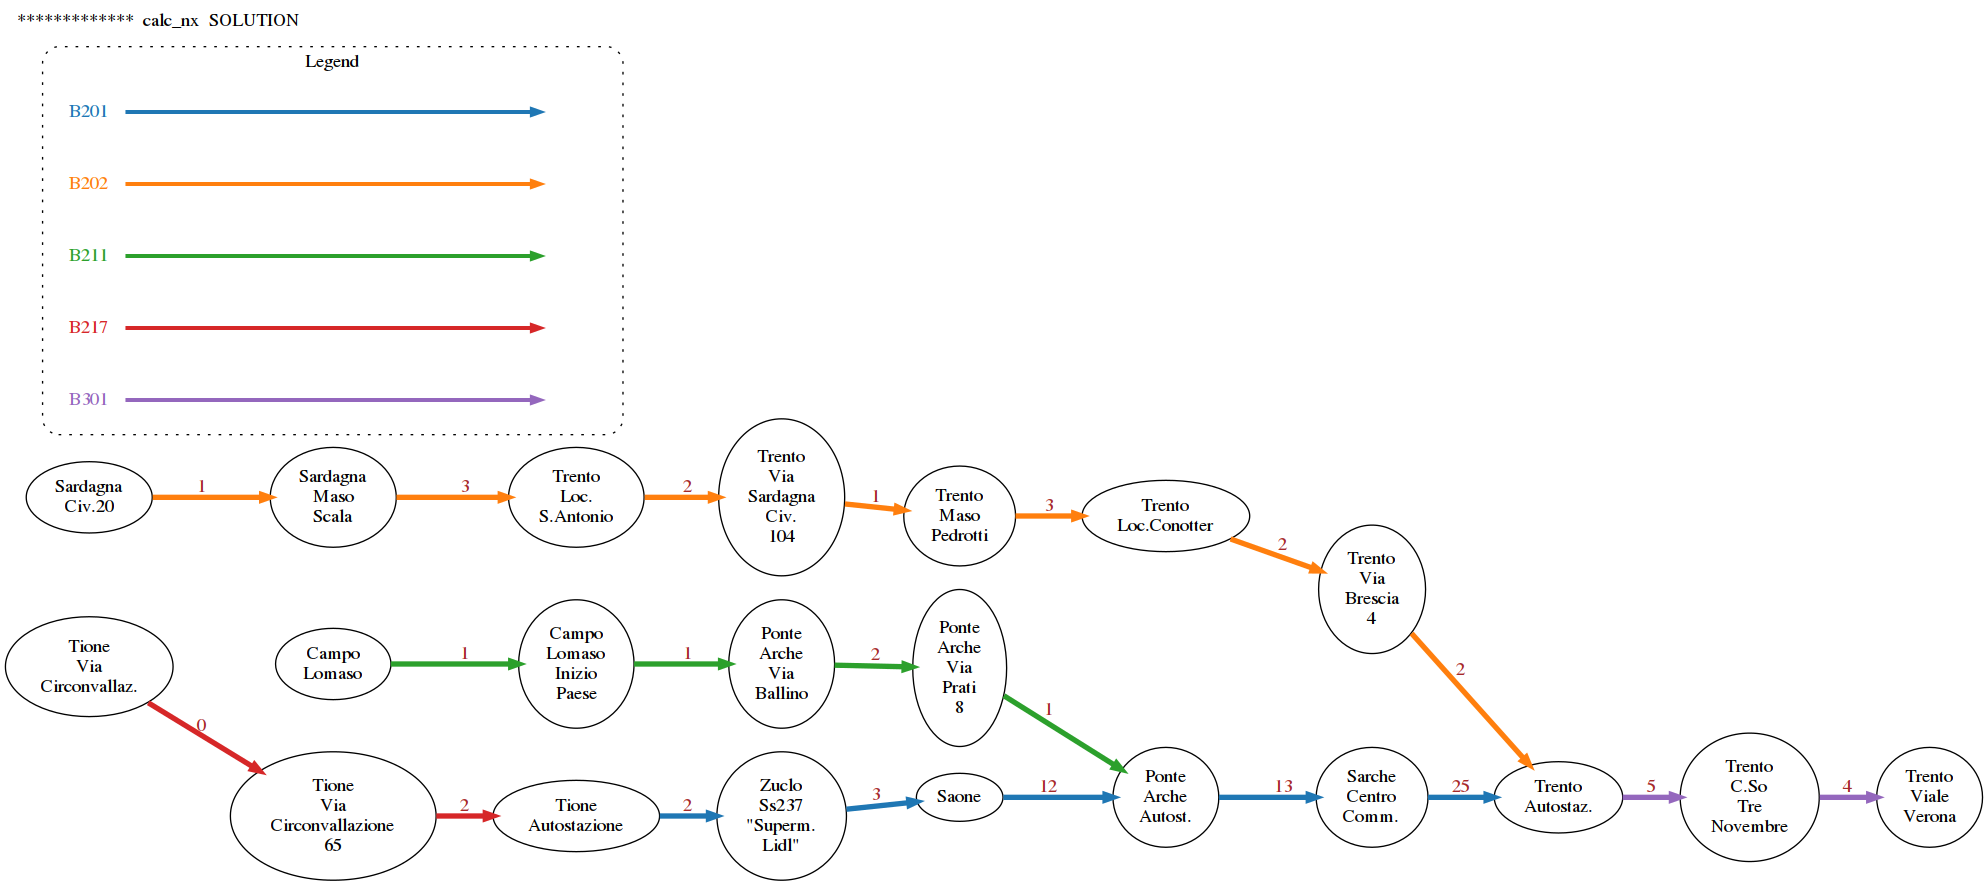

In [13]:


def calc_nx(stops):
    
    
    G = nx.DiGraph()

    G.graph['graph']= {
                        'rankdir':'LR',  # horizontal layout , 
                        
                      }
    
    G.name = '*************  calc_nx  SOLUTION '
    
    routes = extract_routes(stops)
    
    
    i = 0
    
    for route_short_name in routes:
        
        prev_diz = None

        for diz in stops:

            if diz['route_short_name'] == route_short_name:

                G.add_node( diz['stop_id'], 
                            label=diz['stop_name'].replace(' ', '\n').replace('-','\n'),
                            color='black',
                            fontcolor='black')

                if prev_diz:            

                    G.add_edge(prev_diz['stop_id'], diz['stop_id'])
                    delta_time = to_int_min(diz['arrival_time']) - to_int_min(prev_diz['arrival_time'])

                    edge = G[prev_diz['stop_id']][diz['stop_id']]                
                    edge['weight'] = delta_time
                    edge['label'] = str(delta_time)
                    
                    edge['route_short_name'] = route_short_name
                    
                    edge['color'] =  get_color(i, len(routes))
                    edge['penwidth']= 4
                    

                prev_diz = diz
        i += 1
    return G
        
    
G = calc_nx(stops)

draw_nx(G, get_legend_edges(),

)    

In [13]:


def calc_nx(stops):
    raise Exception('TODO IMPLEMENT ME !')    
    
G = calc_nx(stops)

draw_nx(G, get_legend_edges(),

)    

## 5. Hubs

A _hub_ is a node that allows to switch route, that is, it is touched by _at least_ two different routes. 

For example, _Trento-Autostaz_ is touched by three routes, which is more than one, so it is a hub. Let's examine the node - we know it has `stop_id='1'`:

In [14]:
G.node['1']

{'label': 'Trento\nAutostaz.', 'color': 'black', 'fontcolor': 'black'}

If we examine its `in_edges`, we find it has incoming edges from `stop_id` `'723'` and `'870'`, which represent respectively _Trento Via Brescia_ and _Sarche Centro Commerciale_ :

In [15]:
G.in_edges('1')

InEdgeDataView([('870', '1'), ('723', '1')])

If you get a View object, if needed you can easily transform to a list:

In [16]:
list(G.in_edges('1'))

[('870', '1'), ('723', '1')]

In [17]:
G.node['723']

{'label': 'Trento\nVia\nBrescia\n4', 'color': 'black', 'fontcolor': 'black'}

In [18]:
G.node['870']

{'label': 'Sarche\nCentro\nComm.', 'color': 'black', 'fontcolor': 'black'}

There is only an outgoing edge toward _Trento Corso 3 Novembre_ :

In [19]:
G.out_edges('1')

OutEdgeDataView([('1', '1108')])

In [20]:
G.node['1108']

{'label': 'Trento\nC.So\nTre\nNovembre',
 'color': 'black',
 'fontcolor': 'black'}

If, for example, we want to know the `route_id` of this outgoing edge, we can access it this way:

In [21]:
G['1']['1108']

{'weight': 5,
 'label': '5',
 'route_short_name': 'B301',
 'color': '#9467bd',
 'penwidth': 4}

If you want to change the color attribute of the node `'1'`, you can write like this:

In [22]:
G.node['1']['color'] = 'red'
G.node['1']['fontcolor'] = 'red'

### Implement color_hubs

Implement a function which prints the hubs in the graph G as text, and then draws the graph with the hubs colored in red.
        
**NOTE**: you don't need to recalculate the graph, just set the relevant nodes color to red

**Example**:

```python
>>> color_hubs(G)
SOLUTION: The hubs are:

stop_id:757
Tione
Autostazione

stop_id:742
Ponte
Arche
Autost.

stop_id:1
Trento
Autostaz.
```

![expected-hubs.png](expected-hubs.png)

SOLUTION: The hubs are:

stop_id:757
Tione
Autostazione

stop_id:742
Ponte
Arche
Autost.

stop_id:1
Trento
Autostaz.

Image saved to file:  expected-hubs.png


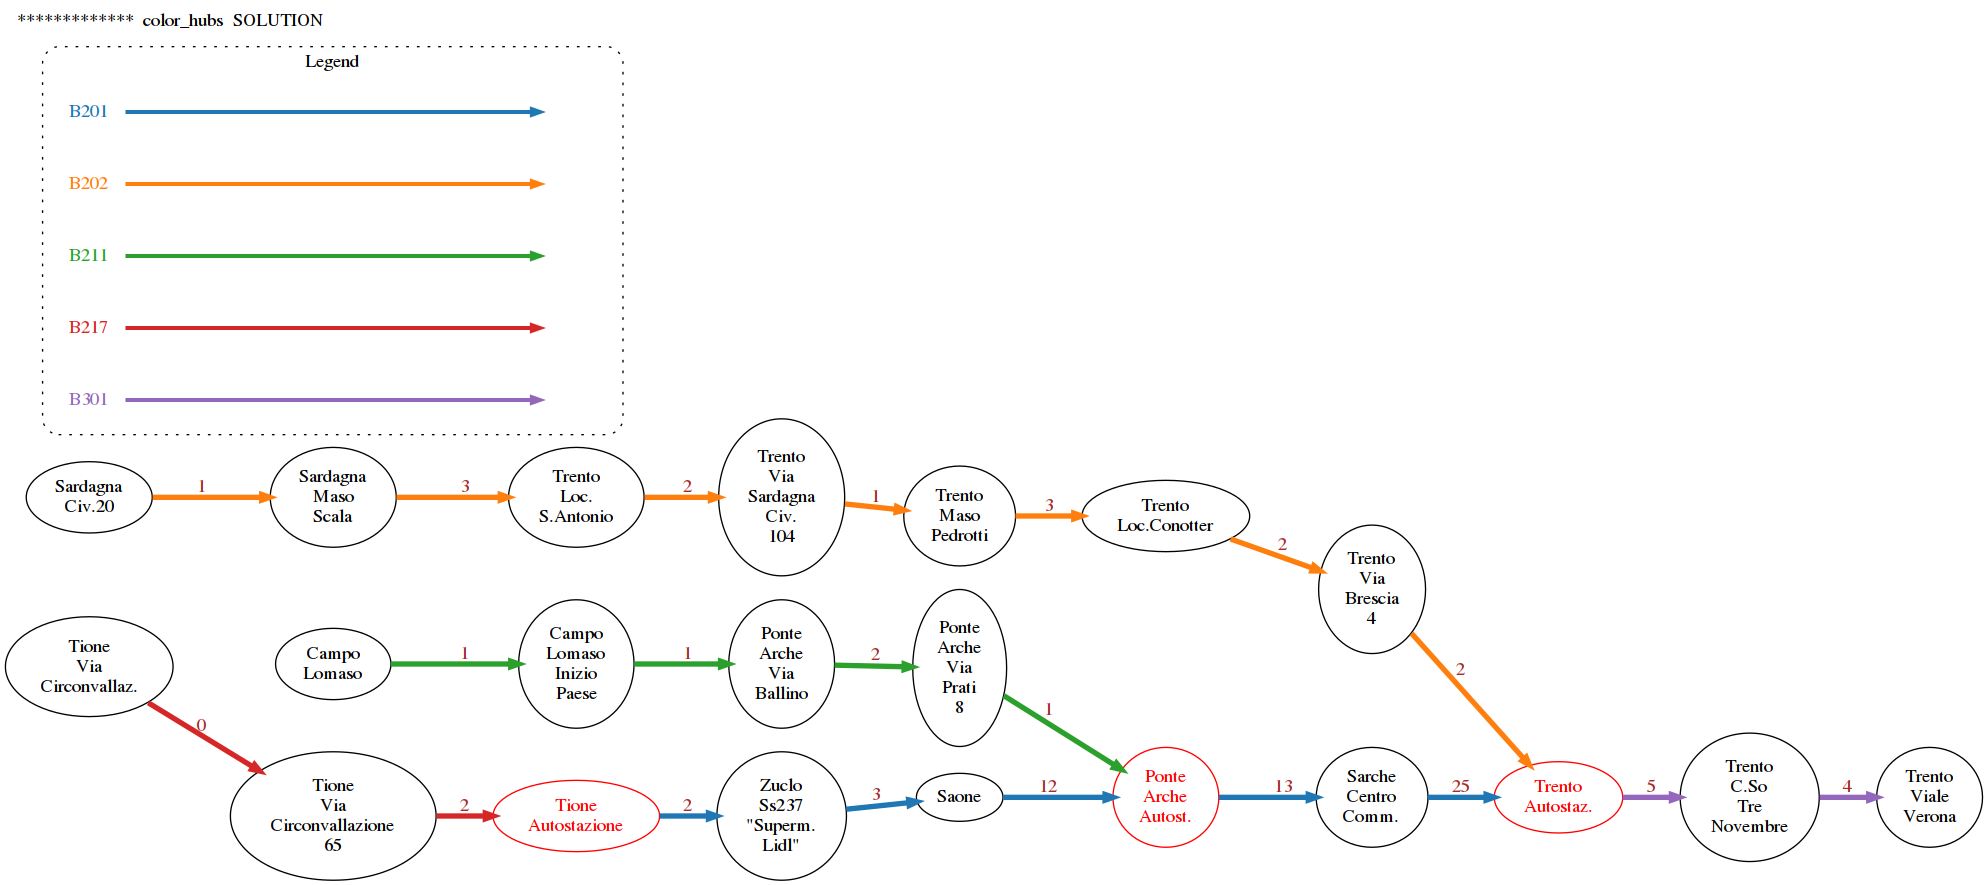

In [23]:


def color_hubs(G):

    
    
    G.name = '*************  color_hubs  SOLUTION '
    
    hubs = []
    for node in G.nodes():
        edges = list(G.in_edges(node)) + list(G.out_edges(node))
        route_short_names = set()
        for edge in edges:
            route_short_names.add(G[edge[0]][edge[1]]['route_short_name'])
        if len(route_short_names) > 1:            
            hubs.append(node)
    
    print("SOLUTION: The hubs are:")
    print()
    
        
    for hub in hubs:
        print("stop_id:%s\n%s\n" % (hub, G.node[hub]['label'] ))    
        G.node[hub]['color']='red'
        G.node[hub]['fontcolor']='red'
        
    draw_nx(G, legend_edges=get_legend_edges()
            
           )
        
    
    
    
color_hubs(G)

In [23]:


def color_hubs(G):

    raise Exception('TODO IMPLEMENT ME !')
    
    
color_hubs(G)

## 6. plot_timings

To extract bus times from `G`, use this: 

In [24]:
G.edges()

OutEdgeView([('757', '746'), ('746', '857'), ('857', '742'), ('742', '870'), ('870', '1'), ('1', '1108'), ('5025', '843'), ('843', '842'), ('842', '3974'), ('3974', '841'), ('841', '881'), ('881', '723'), ('723', '1'), ('1556', '4392'), ('4392', '4391'), ('4391', '4390'), ('4390', '742'), ('829', '3213'), ('3213', '757'), ('1108', '1109')])

If you get a View, you can iterate through the sequence like it were a list

To get the data from an edge, you can use this:

In [25]:
G.get_edge_data('1','1108')

{'weight': 5,
 'label': '5',
 'route_short_name': 'B301',
 'color': '#9467bd',
 'penwidth': 4}

Now implement the function `plot_timings`, which given a networkx DiGraph `G` plots a frequency histogram of the time between bus stops.

**Expected output**:

![expected-timings.png](expected-timings.png)

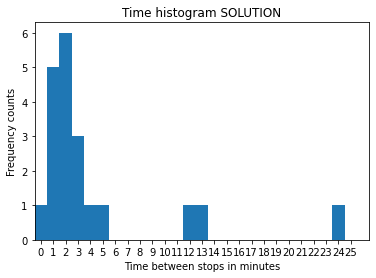

In [26]:

def plot_timings(G):
    
    
    import numpy as np
    import matplotlib.pyplot as plt

    
    timings = [G.get_edge_data(edge[0], edge[1])['weight'] for edge in G.edges()]    

    import matplotlib.pyplot as plt
    import numpy as np

    # add histogram

    min_x = min(timings)      
    max_x = max(timings)      
    bar_width = 1.0
    
    # in this case hist returns a tuple of three values
    # we put in three variables
    n, bins, columns = plt.hist(timings,
                                bins=range(min_x,max_x + 1), 
                                width=1.0)        #  graphical width of the bars

    xs = np.arange(min_x,max_x + 1)
    plt.xlabel('Time between stops in minutes')
    plt.ylabel('Frequency counts')
    plt.title('Time histogram SOLUTION')
    plt.xlim(0, max(timings) + 2)
    plt.xticks(xs + bar_width / 2,  # position of ticks
               xs )   
    
    plt.show()
    
    
plot_timings(G)    

In [26]:

def plot_timings(G):
    raise Exception('TODO IMPLEMENT ME !')
    
plot_timings(G)    